## 0 | Import packages

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
from utilities import importFile, openFile, openHDF5file, getLooseRseal
from tkinter.filedialog import askopenfilename, askopenfilenames
from collections import defaultdict
from nptdms import TdmsFile
print("done!")

done!


## 1 | Open an .hdf5 file and extract channels

In [2]:
# Load data
channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

file imported


In [3]:
# Inspect data frame
channels_data_frame

7  \
Channel A  [-1.6124128324134814, -1.2260207615682315, -1....   
Channel B  [-11.616220826606902, -7.752300066135383, -8.7...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                           8  \
Channel A  [-1.5480141542486916, -1.4192167975478727, -1....   
Channel B  [9.635343909020817, 5.771422947326991, 11.8892...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                           9  \
Channel A  [-1.7412101883719264, -1.4836154759601623, -1....   
Channel B  [0.29753499493087243, -0.6684452226398963, 1.9...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          10  \
Channel A  [-1.5158148151198958, -1.5158148151198958, -1....   
Channel B  [-20.632035761040658, -17.734095272842332, -22...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          11  \
Channel A  [-1.3870174582953112, -1.6124128324134814, -1....   
Channel B  [-11.938214221299425, -13.870174582953112, -14...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          12  \
Channel A  [-1.258220100975559, -1.4514161367694889, -1.3...   
Channel B  [-7.752300066135383, -8.718280260436195, -9.68...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          13  \
Channel A  [-1.3870174582953112, -1.5480141542486916, -1....   
Channel B  [-4.532366064980151, -0.6684452226398963, -5.8...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          14  \
Channel A  [-1.2260207615682315, -1.5480141542486916, -1....   
Channel B  [5.449429535875142, 6.737403183549116, -0.3464...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          15  \
Channel A  [-1.5480141542486916, -1.5480141542486916, -1....   
Channel B  [-3.2443924558328088, -4.210372663158741, -0.9...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          16  \
Channel A  [-1.7412101883719264, -1.7412101883719264, -1....   
Channel B  [8.669363664395322, 4.805442713904577, 0.61952...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          17  \
Channel A  [-2.1276022532796945, -1.870007543835665, -2.1...   
Channel B  [-24.817949755377462, -25.13994313739636, -29....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          18  \
Channel A  [-1.4514161367694889, -1.5480141542486916, -1....   
Channel B  [-10.97223403629284, -17.734095272842332, -15....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          19  \
Channel A  [-1.5480141542486916, -1.5480141542486916, -1....   
Channel B  [-10.00625384849881, -8.074293464545597, -10.0...   
Output A   [0.0

To check how to navigate pandas dataframes go to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.flags.html or check testpulse_Rseal notebook. Some commands in the following cell.


In [4]:
# pandas.DataFrame.at - Access a single value for a row/column label pair.
print(channels_data_frame.at['Channel A', '7'])
print(channels_data_frame.iat[0,0])

# pandas.DataFrame.columns - The column labels of the DataFrame.
print(channels_data_frame.columns)

# pandas.DataFrame.index - The index (row labels) of the DataFrame.
print(channels_data_frame.index)

# pandas.DataFrame.shape - Return a tuple representing the dimensionality of the DataFrame.
print(channels_data_frame.shape)

# pandas.DataFrame.loc - Access a group of rows and columns by label(s) or a boolean array.
print(channels_data_frame.loc[['Channel A', 'Channel B'],:])
print(channels_data_frame.loc[['Channel A'], :])

# pandas.DataFrame.iloc - Purely integer-location based indexing for selection by position.
print(channels_data_frame.iloc[0, :])

[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]
[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]
Index(['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24'],
      dtype='object')
Index(['Channel A', 'Channel B', 'Output A', 'Output B'], dtype='object')
(4, 18)
                                                           7  \
Channel A  [-1.6124128324134814, -1.2260207615682315, -1....   
Channel B  [-11.616220826606902, -7.752300066135383, -8.7...   

                                                           8  \
Channel A  [-1.5480141542486916, -1.4192167975478727, -1....   
Channel B  [9.635343909020817, 5.771422947326991, 11.8892...   

                                                           9  \
Channel A  [-1.7412101883719264, -1.4836154759601623, -1....   
Channel B  [0.29753499493087243, -0.6684452226398963, 1.9...   

                                       

## 2 | Find Test Pulse indices so you can ignore it from analysis

__Protocols used:__

 - OP_VC_clear:
    - Sweep duration: 4950ms
    - Sweep interval: 50ms
    - Test pulse: 100ms (50ms delay and 50ms pulse)
    - Real data per sweep: 4850ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 5100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 5025ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 10100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 10025ms

### 2.1 | Load one sweep from Output A and get the test_pulse indices

In [5]:
sweep_IA = np.array(channels_data_frame.at['Channel A', '7'])
sweep_IB = np.array(channels_data_frame.at['Channel B', '7'])
sweep_OA = np.array(channels_data_frame.at['Output A', '7'])
print('done')

done


In [6]:
test_pulse = np.where(sweep_OA < 0)
test_pulse_OA_indices = test_pulse[0]
print(test_pulse_OA_indices)

[ 625  626  627 ... 1871 1872 1873]


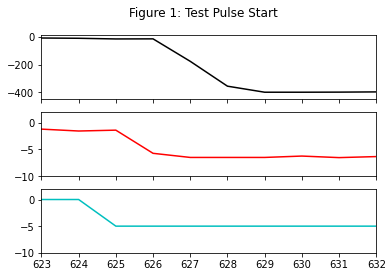

In [32]:
# # To plot in an adjustable pop up window
# %matplotlib tk
 
# To plot inline
%matplotlib inline

# Note how there is a further delay for the channel B (top)
fig, axs = plt.subplots (3, sharex=True)
axs[0].plot(sweep_IB, 'k')
axs[0].axis([test_pulse_OA_indices[0]-2, test_pulse_OA_indices[7], -450, 10])
axs[1].plot(sweep_IA, 'r')
axs[1].axis([test_pulse_OA_indices[0]-2, test_pulse_OA_indices[7], -10, 2])
axs[2].plot(sweep_OA, 'c')
axs[2].axis([test_pulse_OA_indices[0]-2, test_pulse_OA_indices[7], -10, 2])
fig.suptitle('Figure 1: Test Pulse Start', fontsize = 14)
plt.show()

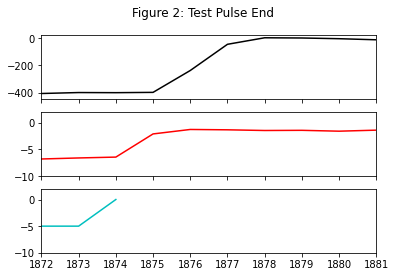

In [33]:
%matplotlib inline

# Note how there is a further delay for the channel B (top)
fig, axs = plt.subplots (3, sharex=True)
axs[0].plot(sweep_IB, 'k')
axs[0].axis([test_pulse_OA_indices[-2], test_pulse_OA_indices[-1]+8, -450, 20])
axs[1].plot(sweep_IA, 'r')
axs[1].axis([test_pulse_OA_indices[-2], test_pulse_OA_indices[-1]+8, -10, 2])
axs[2].plot(sweep_OA, 'c')
axs[2].axis([test_pulse_OA_indices[-2], test_pulse_OA_indices[-1]+8, -10, 2])
fig.suptitle('Figure 2: Test Pulse End', fontsize = 14)
plt.show()

### 2.2 | Get test_pulse indices to remove the epochs where voltage is injected from analysis

We want to find the indices that allow us to remove the bit of recording where the test_pulse is on, so that we are left with a "flat" recording.

In [34]:
# Get the index where the test pulse begins, accounting for the delay between the output channel and the recording
test_pulse_IB_start = test_pulse_OA_indices[0] + 1
print(test_pulse_IB_start)
test_pulse_IB_end = test_pulse_OA_indices[-1] + 5
print(test_pulse_IB_end)

626
1878


## 3 | Find spikes

### 3.1 | Visualize a sweep and its derivative

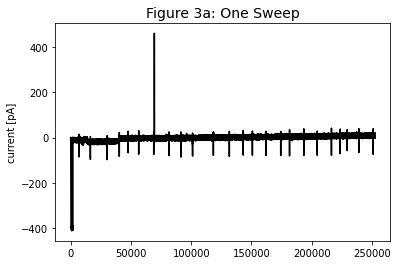

In [48]:
%matplotlib inline

plt.figure(1)
plt.plot(sweep_IB, 'k')
plt.xlim(left=test_pulse_IB_end)

plt.title('Figure 3.1a: One Sweep', fontsize = 14)
plt.ylabel('current [pA]')
lt.show()

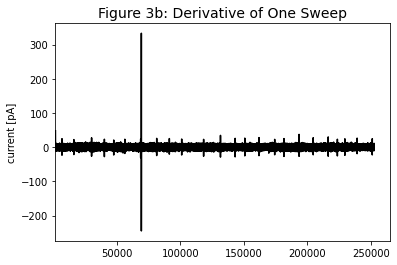

In [47]:
plt.figure(1)
plt.plot(np.diff(sweep_IB), 'k')
plt.xlim(left=test_pulse_IB_end)
plt.title('Figure 3.1b: Derivative of One Sweep', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

### 3.2 | Remove the test_pulse from the trace and try to find spikes with a simple threshold

In [16]:
test_pulse_OA_indices

array([ 625,  626,  627, ..., 1871, 1872, 1873], dtype=int64)

In [51]:
# Tranlate the test_pulse indices from the output channel to the recording channel
test_pulse_IB_indices = np.arange(test_pulse_IB_start, test_pulse_IB_end)
# Delete the indices where the test pulse is on
sweep_IB_no_testpulse = np.delete(sweep_IB, test_pulse_IB_indices)

print(len(sweep_IB))
print(len(test_pulse_IB_indices))
print(len(sweep_IB_no_testpulse))

sweep_IB_no_testpulse

252500
1252
251248


array([-11.61622083,  -7.75230007,  -8.71828026, ...,   5.12743612,
         6.09341636,   9.95733732])

In [52]:
# Try to find spikes with a simple manual threshold
np.where(sweep_IB < (-50)) # detects indices where test_pulse is on

(array([   627,    628,    629, ..., 250993, 250994, 250995], dtype=int64),)

In [15]:
# Try to find spikes with a simple manual threshold
np.where(sweep_IB_no_testpulse < (-50)) # now only detects spikes and noise

(array([  5762,   5763,   5764,   5765,   5766,   5767,  15097,  15098,
         15099,  15100,  15101,  15102,  15103,  29037,  29038,  29039,
         29040,  29041,  29042,  29043,  39095,  39096,  39097,  39098,
         39099,  39100,  46446,  46447,  46448,  46449,  46450,  55183,
         55184,  55185,  55186,  55187,  55188,  67636,  67637,  67638,
         67639,  67640,  67641,  80236,  80237,  80238,  80239,  80240,
         90172,  90173,  90174,  90175,  90176,  99881,  99882,  99883,
         99884,  99885,  99886, 117128, 117129, 117130, 117131, 117132,
        130378, 130379, 130380, 130381, 130382, 130383, 141913, 141914,
        141915, 141916, 141917, 141918, 149502, 149503, 149504, 149505,
        149506, 149507, 160674, 160675, 160676, 160677, 160678, 173006,
        173007, 173008, 173009, 173010, 180315, 180316, 180317, 180318,
        180319, 192190, 192191, 192192, 192193, 192194, 203315, 203316,
        203317, 203318, 203319, 215091, 215092, 215093, 215094, 

In [13]:
# This is something Tiago uses to find spikes in NeuroDAQ
comp = lambda a, b: a < b
comp(2, 2)

False

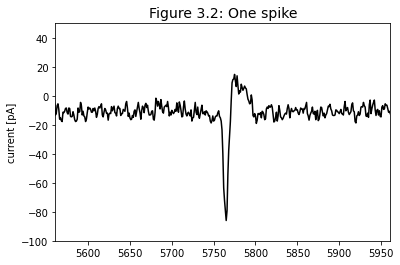

In [53]:
# Zoom in on one of the detected spikes
plt.figure(1)
plt.plot(sweep_IB_no_testpulse, 'k')
plt.axis([(5761-200), (5761+200), -100, 50])
plt.title('Figure 3.2: One spike', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

### 3.3 | Try to use find_peaks() from scipy to detect spikes

In [18]:
from scipy.signal import find_peaks
help(find_peaks)

Help on function find_peaks in module scipy.signal._peak_finding:

find_peaks(x, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
    Find peaks inside a signal based on peak properties.
    
    This function takes a 1-D array and finds all local maxima by
    simple comparison of neighboring values. Optionally, a subset of these
    peaks can be selected by specifying conditions for a peak's properties.
    
    Parameters
    ----------
    x : sequence
        A signal with peaks.
    height : number or ndarray or sequence, optional
        Required height of peaks. Either a number, ``None``, an array matching
        `x` or a 2-element sequence of the former. The first element is
        always interpreted as the  minimal and the second, if supplied, as the
        maximal required height.
    threshold : number or ndarray or sequence, optional
        Required threshold of peaks, the vertical distance to its ne

We can use find_peaks to detect spikes. We reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid most of the noise.

find_peaks allows us to use different parameters. Objectively, the size of the spikes may differ accross sweeps and neurons, so it is hard to establish a hard value for it.

* height: Required height of peaks. Either a number, ``None``, an array matching `x` or a 2-element sequence of the former. The first element is always interpreted as the  minimal and the second, if supplied, as the maximal required height.
* threshold: Required threshold of peaks, the vertical distance to its neighboring samples. Either a number, ``None``, an array matching `x` or a 2-element sequence of the former. The first element is always interpreted as the  minimal and the second, if supplied, as the maximal required threshold.
* distance: Required minimal horizontal distance (>= 1) in samples between neighbouring peaks. Smaller peaks are removed first until the condition is fulfilled for all remaining peaks.
* prominence: Required prominence of peaks. Either a number, ``None``, an array matching `x` or a 2-element sequence of the former. The first element is always interpreted as the minimal and the second, if supplied, as the maximal required prominence.

To calculate and return properties without excluding peaks, provide the open interval ``(None, None)`` as a value to the appropriate argument (excluding `distance`). 

The conditions are evaluated in the following order: `plateau_size`, `height`, `threshold`, `distance`, `prominence`, `width`. In most cases this order is the fastest one because faster operations are applied first to reduce the number of peaks that need to be evaluated later.

The function returns the indices of peaks that satisfy all conditions and different properties like `peak_heights`, `left_thresholds`, `prominences` (and the indices for its bases), and `width_heights`.

#### 3.3.1 | Examine the properties we obtain from `find_peaks` for one sweep

In [55]:
peaks, properties = find_peaks(-sweep_IB_no_testpulse, height = (None, None), threshold = (None, None), distance = None, prominence = (None, None), width = (None, None))
# Reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid the noise.
print(len(peaks))
peaks

66151


array([     3,      5,      7, ..., 251237, 251242, 251244], dtype=int64)

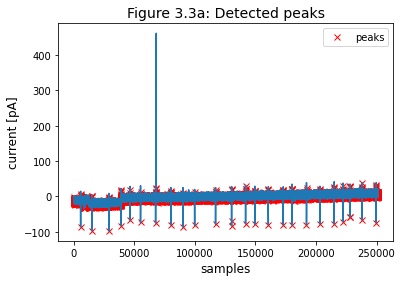

In [139]:
plt.plot(peaks, sweep_IB_no_testpulse[peaks], "xr"); plt.plot(sweep_IB_no_testpulse); plt.legend(['peaks'])
plt.title('Figure 3.3a: Detected peaks', fontsize = 14)
plt.xlabel('samples', fontsize = 12)
plt.ylabel('current [pA]', fontsize = 12)
plt.show()

We can see that it detects pretty much anything. Let's take a look at the different properties we can use to narrow down the spike detection.

In [60]:
properties

{'peak_heights': array([10.32824724, 10.00625385,  6.78631987, ...,  0.66844522,
        -3.51746907, -2.55148885]),
 'left_thresholds': array([1.60996698, 4.82990098, 1.609967  , ..., 1.60996703, 2.57594729,
        4.18591434]),
 'right_thresholds': array([5.15189438, 4.82990098, 0.9659802 , ..., 8.04983523, 3.21993411,
        2.57594728]),
 'prominences': array([ 2.57594718,  4.82990098,  0.9659802 , ..., 10.62578255,
         3.21993411,  4.82990116]),
 'left_bases': array([     1,      4,      6, ..., 251204, 251238, 251238], dtype=int64),
 'right_bases': array([     4,      6,      8, ..., 251247, 251243, 251247], dtype=int64),
 'widths': array([1.05      , 1.        , 0.8       , ..., 2.04333334, 1.125     ,
        1.51442308]),
 'width_heights': array([ 9.04027366,  7.59130336,  6.30332977, ..., -4.64444605,
        -5.12743613, -4.96643943]),
 'left_ips': array([2.20000000e+00, 4.50000000e+00, 6.70000000e+00, ...,
        2.51235617e+05, 2.51241375e+05, 2.51243423e+05]),
 'r

In [146]:
properties['prominences']

array([ 2.57594718,  4.82990098,  0.9659802 , ..., 10.62578255,
        3.21993411,  4.82990116])

(array([7.15130526e-02, 6.42644306e-03, 6.25186274e-05, 1.17959674e-06,
       0.00000000e+00, 0.00000000e+00, 1.17959674e-06, 7.07758046e-06,
       1.65143544e-05, 3.53879023e-06]), array([  0.32199338,  13.13733009,  25.9526668 ,  38.76800351,
        51.58334022,  64.39867693,  77.21401364,  90.02935035,
       102.84468706, 115.66002377, 128.47536048]), <BarContainer object of 10 artists>)


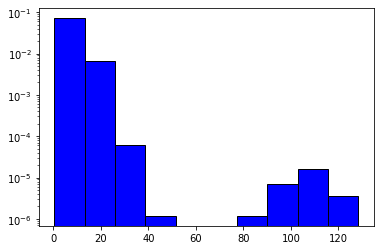

In [147]:
# hist() returns three things: the values, the bin edges, and the patches (which are the columns)
print(plt.hist(properties['prominences']bins = 10, density = 1, histtype = 'bar', log = True, color = 'b', ec = 'k')))

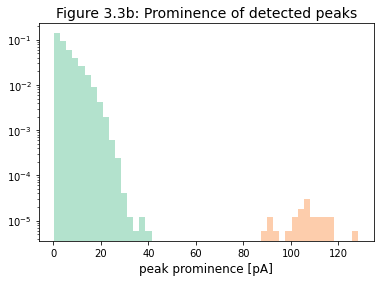

In [138]:
# hist() returns three things: the values, the bin edges, and the patches (which are the columns)
n, bins, patches = plt.hist(properties['prominences'], bins = 50, density = 1, histtype = 'bar', log = True'P# Use log = True to see the smaller peak in the histogram that corresponds to the spikes
astel2')
noise = cmap(0)
spikes = cmap(1)

for i in range(0, (round(len(bins)/2))):
    pa((len(bins)-1)/2)))cecolor(noise)
for i in range((round(len(bins)/2)), l(round((len(bins)-1)/2))ches[i].set_facecolor(spikes)
    
    plt.title('Histogram of thFigure 3.3b: Prected peaks')
plt.show())
p, fontsize = 14lt.ylaxel("Ho'peak prominence [pA]'ontsize=16 ) 
2

#### 3.3.2 | Adjust parameters
As we can see in the histogram above, most of our detected peaks correspond to low amplitude noise in the baseline, whereas the spikes fall around 100pA prominence. We could use this plot to decide the optimal spike detection approach for each neuron.

In [150]:
print(np.mean(properties['prominences']))
print(np.median(properties['prominences']))
print(max(properties['prominences']))

5.535282311838624
4.18591426403065
128.47536048022562


In [152]:
# Let's try with a prominence of 60, which is where the gap between noise and signal is in the histogram
peaks, properties = find_peaks(-sweep_IB_no_testpulse, height = (None, None), threshold = (None, None), distance = None, prominence = 60, width = (None, None))
# Reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid the noise.
print(len(peaks)) # now we have a more reasonable number
peaks

24


array([  5765,  15101,  29041,  39098,  46449,  55186,  67640,  80239,
        90174,  99884, 117131, 130382, 141916, 149505, 160677, 173009,
       180318, 192192, 203318, 215094, 222296, 228186, 237828, 249742],
      dtype=int64)

In [153]:
properties['prominences']

array([ 88.22618227, 101.10591566, 112.37568489,  91.44611724,
        90.15814772, 102.07190282, 105.6138302 , 104.96984182,
       128.47536048, 106.9018018 ,  98.85196699, 108.51176843,
       105.29183596, 107.54578969, 107.22379594, 107.22379584,
       113.01967724, 114.30765154, 117.20559296, 117.20559296,
       110.44373304,  93.37808453, 104.32585917, 113.66366641])

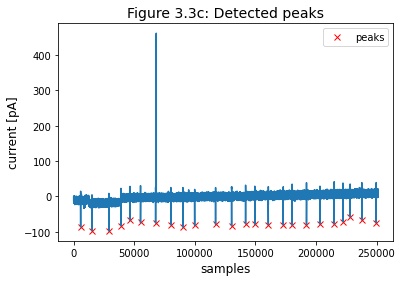

In [155]:
plt.plot(peaks, sweep_IB_no_testpulse[peaks], "xr"); plt.plot(sweep_IB_no_testpulse); plt.legend(['peaks'])
plt.title('Figure 3.3c: Detected peaks', fontsize = 14)
plt.xlabel('samples', fontsize = 12)
plt.ylabel('current [pA]', fontsize = 12)
plt.show()

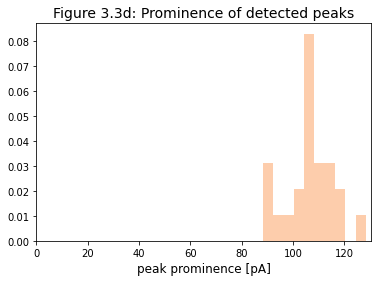

In [159]:
# hist() returns three things: the values, the bin edges, and the patches (which are the columns)
cmap = plt.get_cmap('Pastel2')
noise = cmap(0)
spikes = cmap(1)

plt.hist(properties['prominences'], bins = 10, density = 1, histtype = 'bar', log = False, color = spikes)
plt.title('Figure 3.3d: Prominence of detected peaks', fontsize = 14)
plt.xlabel('peak prominence [pA]', fontsize = 12)
plt.xlim([0,None])
plt.show()

Now that is much cleaner and detects only the spikes. Alright, let's try to do this for all the sweeps recorded from the same neuron.

### Loop over sweeps to first delete all test_pulses and then concatenate the rest

In [25]:
# Load data
channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

file imported


In [ ]:
for sweep in channels_data_frame.columns:
    sweep_IB = np.array(channels_data_frame.at['Channel B', sweep])
    sweep_OA = np.array(channels_data_frame.at['Output A', sweep])

    test_pulse = np.where(sweep_OA < 0)
    test_pulse_OA_indices = test_pulse[0]
    test_pulse_IB_end = test_pulse_OA_indices[-1] + 1 + 4

    sweep_IB_no_testpulse = sweep_IB[test_pulse_IB_end:]

    peaks, properties = find_peaks(-sweep_IB_no_testpulse,
                                   height = None,
                                   threshold = None,
                                   distance = 5,
                                   prominence = 50,
                                   width = 2,
                                   wlen = None,
                                   rel_height = None,
                                   plateau_size = None)
                                   






In [ ]:
print(len(sweep_IB))
print(len(sweep_IB[test_pulse_IB_end:]))

In [ ]:
plt.plot(sweep_IB[test_pulse_IB_end:])
plt.show()

In [ ]:
c = np.array(channels_data_frame.loc['Channel B', :])
d = np.concatenate(c)
plt.plot(d, 'r')
#plt.axis([0, len(d), -200, 200])
plt.show()

In [ ]:
peaks, properties = find_peaks(-sweep_IB_no_testpulse, height = None, distance = 5, prominence = 50, width = 2)
peaks

In [ ]:
plt.plot(peaks, sweep_IB_no_testpulse[peaks], "xr"); plt.plot(sweep_IB_no_testpulse); plt.legend(['peaks'])
plt.show()

# Types of firing rate to assess

 * Instantaneous firing rate: inverse of the interspike interval

 * Firing rate over full recording

 * Firing rate over time windows (1s?)